In [1]:
from PIL import Image
import numpy as np
import random
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import matplotlib.pyplot as plt

In [2]:
img = Image.open("ima1.png")


In [3]:
img_gray = img.convert("L")

img_array = np.array(img_gray)

threshold = 60  
binary_matrix = (img_array > threshold).astype(np.uint8)
print(binary_matrix)


[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [4]:
neighborhood_size = 1 

neighb= neighborhood_size

ematrix = np.pad(binary_matrix, neighb, mode='constant', constant_values=0)
print(ematrix)

[[0 0 0 ... 0 0 0]
 [0 1 1 ... 1 1 0]
 [0 1 1 ... 1 1 0]
 ...
 [0 1 1 ... 1 1 0]
 [0 1 1 ... 1 1 0]
 [0 0 0 ... 0 0 0]]


In [5]:
lig, colon = ematrix.shape


print("Matrix Height:", lig)
print("Matrix Width:", colon)

Matrix Height: 249
Matrix Width: 214


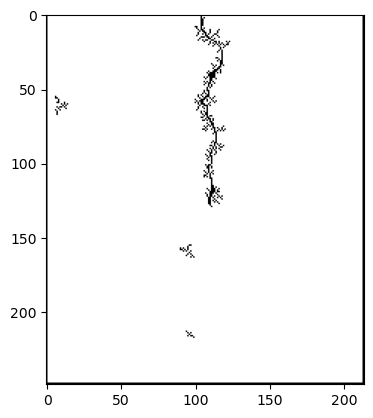

In [6]:
p00=0.0000000   

c1=0.15
c2=0.05

c3=0.002
c4=0.0001

 

c5=0.00001
 

rows = 242
cols = 214

grid = np.pad(binary_matrix, neighb, mode='constant', constant_values=0)


grid_states = [grid.copy()]


def update_grid(grid):
    new_grid = grid.copy()
    for i in range(rows):
        for j in range(cols):
            if grid[i, j] == 1:
                
                neighbors = [
                    grid[i-1, j-1], grid[i-1, j], grid[i-1, j+1],
                    grid[i, j-1], grid[i, j+1], grid[i+1, j-1], grid[i+1, j], grid[i+1, j+1]
                ]
                conf=[1, 1, 1, 1, 1, 1, 1, 1]
                if neighbors in [
                    [0, 1, 1, 1, 1, 0, 1, 1], [0, 1, 0, 1, 1, 1, 1, 1],
                    [1, 1, 0, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 0, 1, 0], [0, 0, 1, 1, 1, 1, 1, 1], [1, 1, 0, 1, 0, 1, 1, 1],
                    [1, 1, 1, 0, 1, 0, 1, 1], [1, 0, 0, 1, 1, 1, 1, 1], [0, 1, 1, 0, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 0, 0], [1, 1, 1, 1, 0, 1, 1, 0], [1, 1, 1, 1, 1, 0, 0, 1]
                ]:
                    if random.random() < c4:
                        new_grid[i, j] = 0
                        
                
                        
                elif neighbors in [
                    [0, 1, 1, 1, 1, 1, 1, 0], [1, 1, 0, 1, 1, 0, 1, 1], [1, 1, 1, 0, 0, 1, 1, 1], 
                    [1, 0, 1, 1, 1, 1, 0, 1], [0, 1, 1, 1, 1, 1, 0, 1], [1, 1, 0, 1, 1, 1, 0, 1],
                    [1, 1, 1, 1, 0, 0, 1, 1], [1, 0, 1, 1, 1, 1, 1, 0],
                    [1, 1, 0, 0, 1, 1, 1, 1], [1, 1, 1, 0, 1, 1, 1, 0],
                    [0, 1, 1, 1, 0, 1, 1, 1], [1, 0, 1, 1, 1, 0, 1, 1]
                ]:
                    if random.random() < c3:
                        new_grid[i, j] = 0
                        
                        
                               
                        
                elif neighbors in [
                    [0, 1, 1, 1, 1, 1, 1, 1],[1, 1, 0, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 0, 1, 1]
                ]:
                    if random.random() < c1:
                        new_grid[i, j] = 0                 
                        
                elif neighbors in [
                    [1, 0, 1, 1, 1, 1, 1, 1],[1, 1, 1, 0, 1, 1, 1, 1],
                    [1, 1, 1, 1, 0, 1, 1, 1], [1, 1, 1, 1, 1, 1, 0, 1]
                ]:
                    if random.random() < c2:
                        new_grid[i, j] = 0 
    
                elif neighbors in [
                    conf
                ]:
                    if random.random() < p00:
                        new_grid[i, j] = 0
                        
                else:
                    if random.random() < c5:
                        new_grid[i, j] = 0
            
    
    new_grid[0, :] = 0  
    new_grid[-1, :] = 0  
    new_grid[:, 0] = 0  
    new_grid[:, -1] = 0  

    return new_grid
                    

iterations = 10
for _ in range(iterations):
    grid = update_grid(grid)
    grid_states.append(grid.copy())


for i, state in enumerate(grid_states):
    plt.imshow(state, cmap='gray', vmin=0, vmax=1)  
    plt.savefig(f'grid_state_{i}.png', dpi=1200)


In [ ]:
def update_grid(grid):
    new_grid = grid.copy()
    for i in range(rows):
        for j in range(cols):
            if grid[i, j] == 1:
                
                neighbors = [
                    grid[i-1, j-1], grid[i-1, j], grid[i-1, j+1],
                    grid[i, j-1], grid[i, j+1], grid[i+1, j-1], grid[i+1, j], grid[i+1, j+1]
                ]
                
                if neighbors in [
                    [1, 1, 1, 1, 1, 1, 0, 0], [1, 1, 1, 1, 0, 1, 1, 0], [1, 1, 1, 1, 1, 0, 0, 1]
                ]:
                    if random.random() < c4:
                        new_grid[i, j] = 0
                        
                
                        
                elif neighbors in [
                    [0, 1, 1, 1, 1, 1, 1, 0], [1, 1, 0, 1, 1, 0, 1, 1], [1, 1, 1, 0, 0, 1, 1, 1], [1, 0, 1, 1, 1, 1, 0, 1], [0, 1, 1, 1, 1, 1, 0, 1], [1, 1, 0, 1, 1, 1, 0, 1],
                    [1, 1, 1, 1, 0, 0, 1, 1], [1, 0, 1, 1, 1, 1, 1, 0],
                    [1, 1, 0, 0, 1, 1, 1, 1], [1, 1, 1, 0, 1, 1, 1, 0],
                    [0, 1, 1, 1, 0, 1, 1, 1], [1, 0, 1, 1, 1, 0, 1, 1]
                ]:
                    if random.random() < c3:
                        new_grid[i, j] = 0
                        
                
                        
                elif neighbors in [
                    [0, 0, 0, 0, 0, 0, 0, 0]
                ]:
                    if random.random() < p8:
                        new_grid[i, j] = 0            
                               
                        
                elif neighbors in [
                    [0, 1, 1, 1, 1, 1, 1, 1],[1, 1, 0, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 0, 1, 1]
                ]:
                    if random.random() < c1:
                        new_grid[i, j] = 0                 
                        
                elif neighbors in [
                    [1, 0, 1, 1, 1, 1, 1, 1],[1, 1, 1, 0, 1, 1, 1, 1],
                    [1, 1, 1, 1, 0, 1, 1, 1], [1, 1, 1, 1, 1, 1, 0, 1]
                ]:
                    if random.random() < c2:
                        new_grid[i, j] = 0 
    
                elif neighbors in [
                    [1, 1, 1, 1, 1, 1, 1, 1]
                ]:
                    if random.random() < p00:
                        new_grid[i, j] = 0
    
    new_grid[0, :] = 0  
    new_grid[-1, :] = 0  
    new_grid[:, 0] = 0  
    new_grid[:, -1] = 0  

    return new_grid
                    

In [ ]:

p21 = 0.3
p22 = 0.5
p23 = 0.5
p24 = 0.5
p25 = 0.5

p31 = 0.5
p32 = 0.5
p33 = 0.5
p34 = 0.5
p35 = 0.5
p36 = 0.5
p37 = 0.5

p41 = 0.3
p42 = 0.3
p43 = 0.3
p44 = 0.3
p45 = 0.3
p46 = 0.3
p47 = 0.3

p51 = 0.2
p52 = 0.2
p53 = 0.2
p54 = 0.2
p55 = 0.2
p56 = 0.2

p61 = 0.2
p62 = 0.2
p63 = 0.2
p64 = 0.2
p65 = 0.2

p71 = 0.2
p72 = 0.2

p8 = 0.2

p11=0.2
p12=0.2
p00=0.0001